In [2]:
% pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

Populating the interactive namespace from numpy and matplotlib


In [3]:
train=pd.read_csv('C:/Users/Shiva Chandra/Desktop/ML/project/housing.csv')
train.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [4]:
train.shape


(20640, 10)

In [5]:
train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [6]:
train.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [7]:
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
train['total_bedrooms']=train['total_bedrooms'].fillna(train['total_bedrooms'].mean())

In [9]:
train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [10]:
Q1 = train['median_income'].quantile(0.25)
Q3 = train['median_income'].quantile(0.75)
IQR = Q3 - Q1
filt_train = train.query('(@Q1 - 1.5 * @IQR) <= median_income <= (@Q3 + 1.5 * @IQR)')

In [11]:
filt_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100
10,-122.26,37.85,52,2202,434.0,910,402,3.2031,NEAR BAY,281500
11,-122.26,37.85,52,3503,752.0,1504,734,3.2705,NEAR BAY,241800


In [12]:
filt_train.shape,train.shape

((19959, 10), (20640, 10))

In [13]:
train = filt_train
train.shape

(19959, 10)

In [14]:
train['median_income'].value_counts()

3.1250    49
2.8750    46
4.1250    44
2.6250    44
3.8750    41
3.3750    38
3.0000    38
4.0000    37
3.6250    37
4.3750    35
2.1250    33
2.3750    32
4.6250    31
3.5000    30
3.2500    29
1.6250    29
3.7500    29
2.2500    29
4.8750    29
2.5000    28
4.2500    28
3.6875    26
2.7500    25
4.5000    24
1.8750    21
2.5625    21
5.0000    20
3.0625    19
3.3125    18
2.0000    18
          ..
2.6579     1
5.0463     1
7.3028     1
4.9757     1
5.1014     1
3.7201     1
6.0791     1
1.2185     1
3.3306     1
1.1696     1
6.0783     1
3.7007     1
2.3935     1
5.1084     1
6.5616     1
3.0431     1
4.0650     1
4.3148     1
7.0010     1
6.5078     1
2.2926     1
5.4490     1
1.3187     1
6.1592     1
2.2452     1
2.1726     1
5.9508     1
2.7600     1
6.6756     1
2.5577     1
Name: median_income, Length: 12302, dtype: int64

In [15]:
train_med=train

In [16]:
train_med.shape

(19959, 10)

In [17]:
train.shape

(19959, 10)

In [18]:
train['median_income_rows'] = pd.cut(train['median_income'], [0.000, 3.5, 7.0, 10.0], labels=['Low_income', 'medium_income', 'High_income'])

In [19]:
train.shape

(19959, 11)

In [20]:
train['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [21]:
train['median_income_rows'].unique()

[High_income, medium_income, Low_income]
Categories (3, object): [Low_income < medium_income < High_income]

In [22]:
train['total_bedrooms'].unique()

array([ 190.,  235.,  280., ..., 3008., 1857., 1052.])

In [23]:
dummy = pd.get_dummies(train['ocean_proximity'])
dummy.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0


In [24]:
train = pd.concat([train, dummy], axis=1)

In [25]:
train.dtypes

longitude              float64
latitude               float64
housing_median_age       int64
total_rooms              int64
total_bedrooms         float64
population               int64
households               int64
median_income          float64
ocean_proximity         object
median_house_value       int64
median_income_rows    category
<1H OCEAN                uint8
INLAND                   uint8
ISLAND                   uint8
NEAR BAY                 uint8
NEAR OCEAN               uint8
dtype: object

In [26]:
train = train.drop(['median_income'], axis=1)

In [27]:
train.dtypes

longitude              float64
latitude               float64
housing_median_age       int64
total_rooms              int64
total_bedrooms         float64
population               int64
households               int64
ocean_proximity         object
median_house_value       int64
median_income_rows    category
<1H OCEAN                uint8
INLAND                   uint8
ISLAND                   uint8
NEAR BAY                 uint8
NEAR OCEAN               uint8
dtype: object

In [28]:

from sklearn.preprocessing import LabelEncoder
train_labelencoder = LabelEncoder()
train['median_income_rows']= train_labelencoder.fit_transform(train['median_income_rows'])
train.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,ocean_proximity,median_house_value,median_income_rows,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2,-122.24,37.85,52,1467,190.0,496,177,NEAR BAY,352100,0,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,NEAR BAY,341300,2,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,NEAR BAY,342200,2,0,0,0,1,0
5,-122.25,37.85,52,919,213.0,413,193,NEAR BAY,269700,2,0,0,0,1,0
6,-122.25,37.84,52,2535,489.0,1094,514,NEAR BAY,299200,2,0,0,0,1,0


In [29]:
train = train.drop(['ocean_proximity'], axis=1)

In [30]:
train.shape

(19959, 14)

In [31]:
train.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_house_value      int64
median_income_rows      int64
<1H OCEAN               uint8
INLAND                  uint8
ISLAND                  uint8
NEAR BAY                uint8
NEAR OCEAN              uint8
dtype: object

C:\Users\Shiva Chandra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


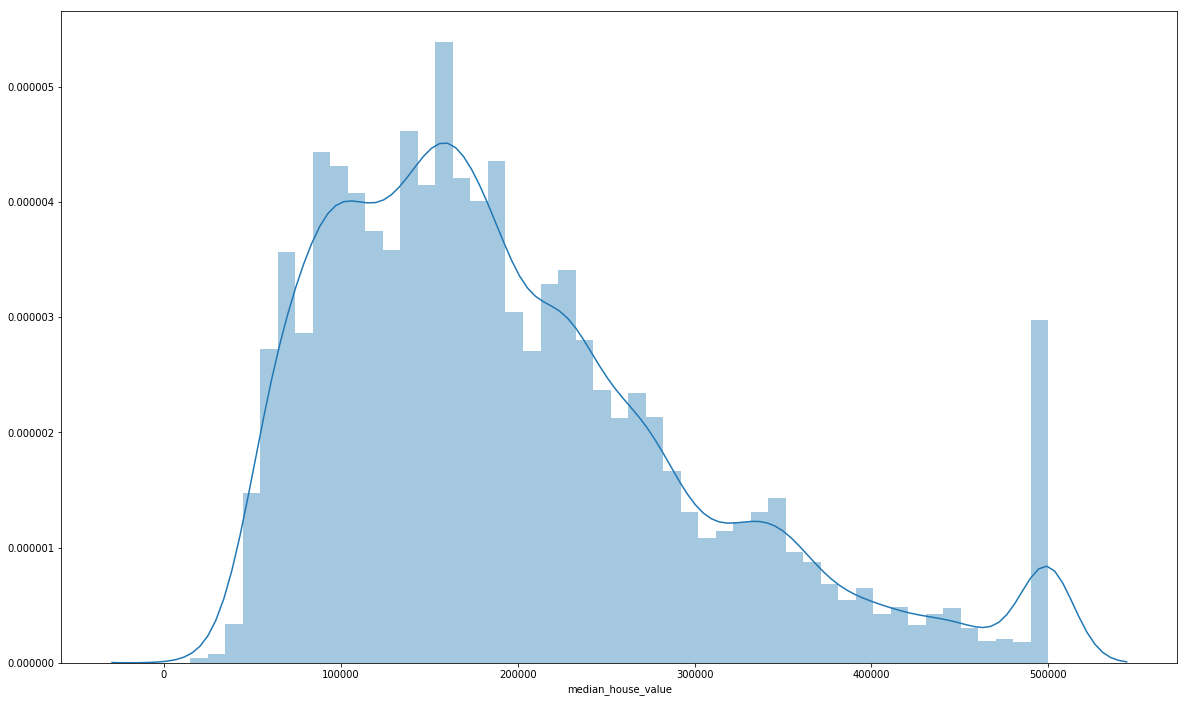

In [32]:
plt.figure(figsize=(20,12))
sns.distplot(train['median_house_value'])
plt.show()

In [33]:
train[train['median_house_value']>450000]['median_house_value'].value_counts().head()

500001    527
500000     27
475000      8
466700      4
468800      3
Name: median_house_value, dtype: int64

In [34]:
train=train.loc[train['median_house_value']<500001,:]

C:\Users\Shiva Chandra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


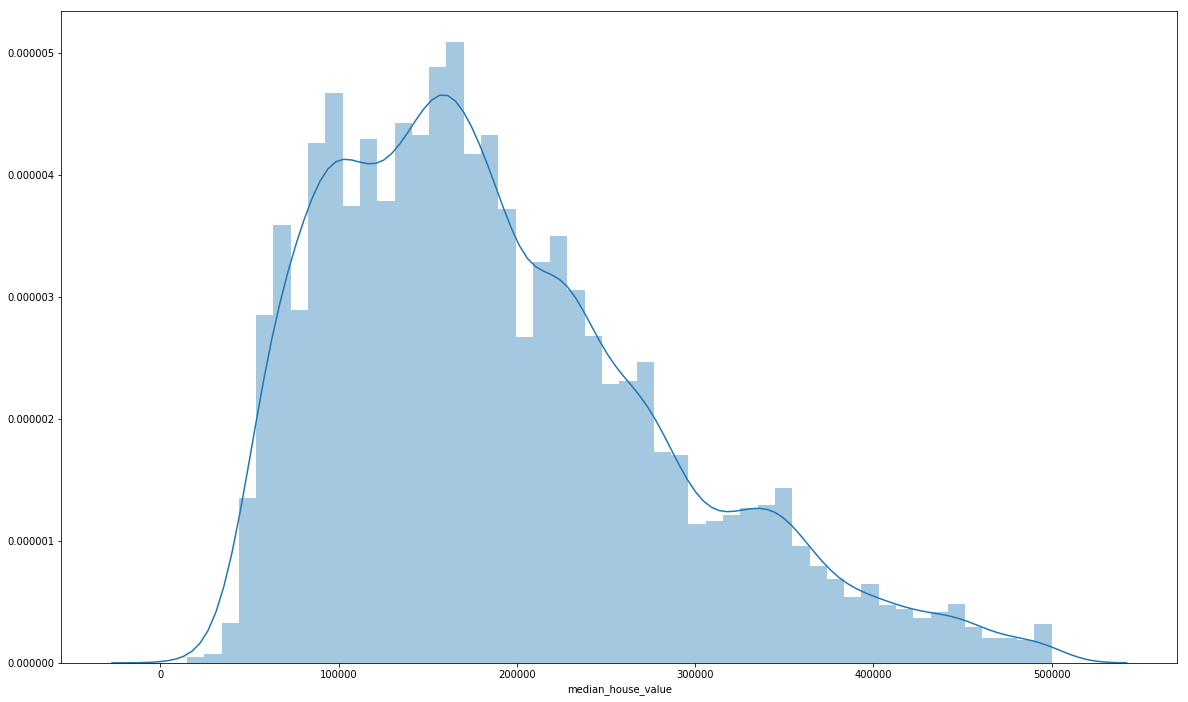

In [35]:
plt.figure(figsize=(20,12))
sns.distplot(train['median_house_value'])
plt.show()

In [36]:
train['bed per house']=train['total_bedrooms']/train['total_rooms']
train['h/p']=train['households']/train['population']

In [37]:
x=train.drop('median_house_value',axis=1).values
y=train['median_house_value'].values

In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [39]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(15545, 15)
(15545,)
(3887, 15)
(3887,)


In [40]:
lin = LinearRegression()

In [41]:
lin.fit(xtrain, ytrain)
predictions = lin.predict(xtest)

In [42]:
print(sqrt(mean_squared_error(ytest, predictions)))

70563.10520125084


In [43]:
from sklearn.tree import DecisionTreeRegressor
dtree_reg = DecisionTreeRegressor(max_depth=11)

In [44]:
dtree_reg.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [45]:
pred = dtree_reg.predict(xtest)
print("rmse of decision tree is",math.sqrt(mean_squared_error(ytest, pred)))

rmse of decision tree is 56078.12770810965


In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
model = DecisionTreeClassifier(max_depth = 100, min_samples_leaf =2, max_features = 'sqrt',min_samples_split = 3,random_state=82)
model.fit(xtrain,ytrain)
predicted_train = model.predict(xtrain)
true_value = ytrain
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 48.05%


In [48]:
lin.score (xtest, ytest)

0.46001548259958236

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 30, min_samples_leaf = 50, max_features = 'sqrt',n_estimators = 1000)
model.fit(xtrain,ytrain)
predicted_train = model.predict(xtrain)
true_value = ytrain
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 63.74%


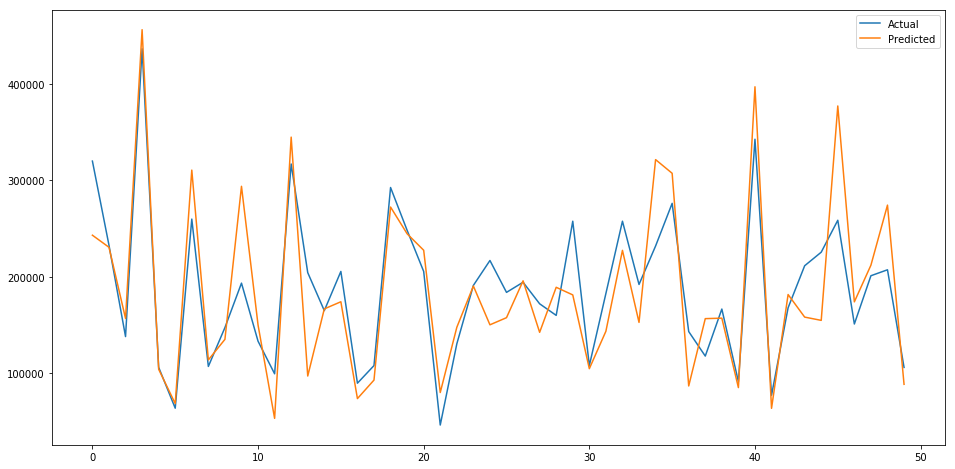

In [50]:
test = pd.DataFrame({'Predicted':pred,'Actual':ytest})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])